<a href="https://colab.research.google.com/github/zeinabghannam/ImagePreprocessingFingerprint/blob/main/Morpholological_Operations_Fingerprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the fingerprint image
image_path = "/fingerprints/finger1.jpg"
fingerprint_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

##Thresholding

In [ ]:
# Apply thresholding to create a binary image
_, binary_image = cv2.threshold(fingerprint_image, 127, 255, cv2.THRESH_BINARY)

# Morphological operations:

##Erosion:
*  Erosion is a morphological operation that shrinks or erodes the boundaries of the foreground (white) regions in a binary image. It achieves this by sliding a structuring element (kernel) over the image and replacing each pixel with the minimum value in the neighborhood.
*  The key parameter is the size and shape of the kernel. A larger kernel leads to more aggressive erosion.


##Dilation:
*  Dilation is the opposite of erosion. It expands or dilates the boundaries of the foreground regions. It replaces each pixel with the maximum value in the neighborhood defined by the kernel.
*  Parameter: Similar to erosion, the kernel size is crucial. Larger kernels result in more pronounced dilation.

##Openning:
*  Opening is a sequence of an erosion operation followed by a dilation operation. It is particularly effective in removing small noise and fine structures while preserving the overall shape of larger structures.
*  Parameters: Both erosion and dilation parameters are relevant. we can adjust the kernel size for both operations, influencing the scale of structures to be preserved or removed.

##Closing:
*  Closing is a sequence of a dilation operation followed by an erosion operation. It is effective in closing small gaps or breaks in structures and smoothing the boundaries of the foreground.
*  Parameters: Similar to opening, the kernel sizes for dilation and erosion can be adjusted to control the scale of gaps to be closed.

In [ ]:
# Define a kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Apply different morphological operations
# 1. Erosion
erosion_result = cv2.erode(binary_image, kernel, iterations=1)

# 2. Dilation
dilation_result = cv2.dilate(binary_image, kernel, iterations=1)

# 3. Opening (Erosion followed by Dilation)
opening_result = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# 4. Closing (Dilation followed by Erosion)
closing_result = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

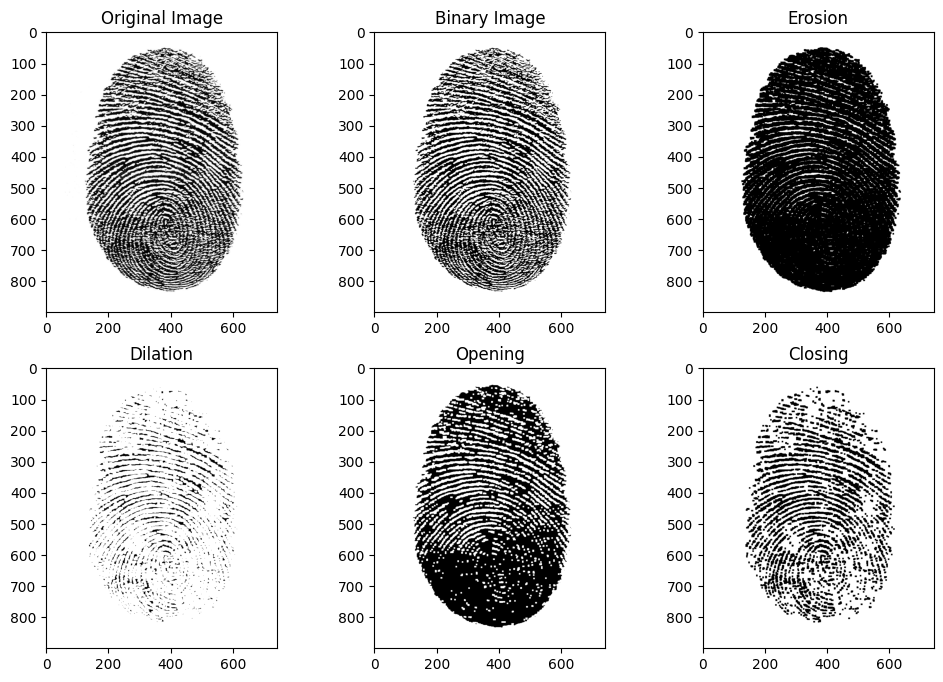

In [ ]:
# Display the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1), plt.imshow(fingerprint_image, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 3, 2), plt.imshow(binary_image, cmap='gray'), plt.title('Binary Image')
plt.subplot(2, 3, 3), plt.imshow(erosion_result, cmap='gray'), plt.title('Erosion')
plt.subplot(2, 3, 4), plt.imshow(dilation_result, cmap='gray'), plt.title('Dilation')
plt.subplot(2, 3, 5), plt.imshow(opening_result, cmap='gray'), plt.title('Opening')
plt.subplot(2, 3, 6), plt.imshow(closing_result, cmap='gray'), plt.title('Closing')

plt.show()